In [15]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [16]:
scenario='sample'
output_folder = '../output/'
epos_iterations = 40

In [17]:
betas = [x/100 for x in range(0, 101, 20)]
alpha=0

In [39]:
mean_global_costs = [0]*len(betas)
std_global_costs = [0]*len(betas)
mean_local_costs = [0]*len(betas)
std_local_costs = [0]*len(betas)

for b in range(len(betas)):
    beta = betas[b]
    
    for t in range(0,6001,300):
        curr_folder = os.path.join(output_folder,"%s-%.2f-%.2f"%(scenario,alpha,beta),'t_%d'%t)
        
        global_costs_file = os.path.join(curr_folder,'global-cost.csv')
        with open(global_costs_file, mode='r') as infile:
            reader = csv.reader(infile)
            for i in range(epos_iterations):
                next(reader)

            for rows in reader:
                this_mean_global_cost = float(rows[1])
                this_std_global_cost = float(rows[2])
                if np.isnan(this_mean_global_cost):
                    this_mean_global_cost = 0
                if np.isnan(this_std_global_cost):
                    this_std_global_cost = 0

                mean_global_costs[b] += this_mean_global_cost
                std_global_costs[b] += this_std_global_cost

                break
                
        local_costs_file = os.path.join(curr_folder,'local-cost.csv')
        with open(local_costs_file, mode='r') as infile:
            reader = csv.reader(infile)
            for i in range(epos_iterations):
                next(reader)

            for rows in reader:
                this_mean_local_cost = float(rows[1])
                this_std_local_cost = float(rows[2])
                print(t,this_mean_local_cost)
                if np.isnan(this_mean_local_cost):
                    this_mean_local_cost = 0
                if np.isnan(this_std_local_cost):
                    this_std_local_cost = 0

                mean_local_costs[b] += this_mean_local_cost
                std_local_costs[b] += this_std_local_cost

                break

0 2.4173689132269
0 2.4542735743909
0 2.3918100085666
0 2.3978826340849997
0 2.3495729203033
0 2.2919306927845997


Text(0.5,1,'Global vs Local Objectives')

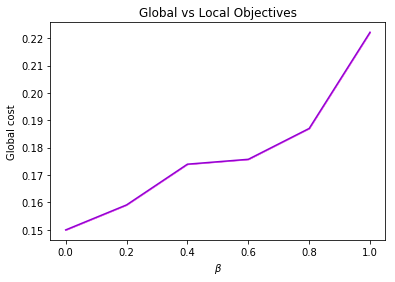

In [40]:
color = [x / 255 for x in [148,0,211]]
color_fill = [x / 255 for x in [238,130,238]]

y_upper = [a_i + b_i for a_i, b_i in zip(mean_global_costs,std_global_costs)]
y_lower = [a_i - b_i for a_i, b_i in zip(mean_global_costs,std_global_costs)]

plt.plot(betas,mean_global_costs,color=color)    
plt.fill_between(betas,y_upper,y_lower,color=color_fill)    
plt.ylabel('Global cost')
plt.xlabel(r'$\beta$')
plt.title('Global vs Local Objectives')

Text(0.5,1,'Global vs Local Objectives')

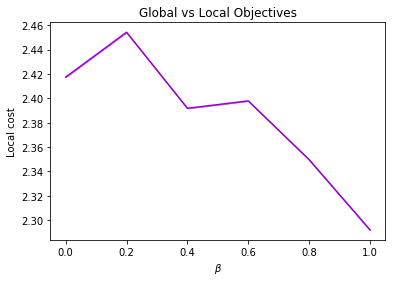

In [41]:
color = [x / 255 for x in [148,0,211]]
color_fill = [x / 255 for x in [238,130,238]]

y_upper = [a_i + b_i for a_i, b_i in zip(mean_local_costs,std_local_costs)]
y_lower = [a_i - b_i for a_i, b_i in zip(mean_local_costs,std_local_costs)]

plt.plot(betas,mean_local_costs,color=color)    
plt.fill_between(betas,y_upper,y_lower,color=color_fill)    
plt.ylabel('Local cost')
plt.xlabel(r'$\beta$')
plt.title('Global vs Local Objectives')